# **First part**

**Integrantes:**

- Anderson Aguila Ancco

- Zarit de la Cruz Lavado

**1. What is the level of observation?**

   The data is aggregated at the state level.

**2. Construct 1 dummy variable called “post_china” where post_china=1 for year>=2001 and 0 otherwise.**

In [68]:
import pandas as pd
dcbp = pd.read_csv("..\data\datacbp.csv")  
print(dcbp.head())


   fipstate   naics   emp    qp1      ap   est  year
0         1  113///  8207  44757  195720  1082  1998
1         1  114///    93    363    1532    30  1998
2         1  115///  1614  10181   45519   194  1998
3         1  211///   804   9477   38146    38  1998
4         1  212///  7074  79136  318295   159  1998


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19868\3337931969.py:2: SyntaxWarning: invalid escape sequence '\d'
  dcbp = pd.read_csv("..\data\datacbp.csv")


In [69]:
dcbp["post_china"]=(dcbp["year"]>= 2001).astype(int)

print(dcbp.head())

   fipstate   naics   emp    qp1      ap   est  year  post_china
0         1  113///  8207  44757  195720  1082  1998           0
1         1  114///    93    363    1532    30  1998           0
2         1  115///  1614  10181   45519   194  1998           0
3         1  211///   804   9477   38146    38  1998           0
4         1  212///  7074  79136  318295   159  1998           0


In [70]:
dcbp.drop(dcbp[(dcbp['emp'] == 0) | (dcbp['est'] == 0) | (dcbp['qp1'] == 0)].index, inplace=True)

**3. Construct 1 dummy variable called “manuf” where manuf=1 for all the observations that start with naics code “3” – which is manufacturing - and 0 otherwise.**

In [71]:
dcbp["manuf"]=dcbp["naics"].str.startswith('3').astype(int)
print(dcbp.head())

   fipstate   naics   emp    qp1      ap   est  year  post_china  manuf
0         1  113///  8207  44757  195720  1082  1998           0      0
1         1  114///    93    363    1532    30  1998           0      0
2         1  115///  1614  10181   45519   194  1998           0      0
3         1  211///   804   9477   38146    38  1998           0      0
4         1  212///  7074  79136  318295   159  1998           0      0


**4. Construct the values necessary to generate the difference-in-difference estimate (i.e. 2x2 Matrix) of the effect of China entering the WTO on employment (emp).**

In [72]:
# Mean of controls before treatment
mean_bef_non_manuf = dcbp.loc[(dcbp['manuf'] == 0) & (dcbp['post_china'] == 0), 'emp'].mean()
print(mean_bef_non_manuf)

# Mean of controls after treatment
mean_aft_non_manuf = dcbp.loc[(dcbp['manuf'] == 0) & (dcbp['post_china'] == 1), 'emp'].mean()
print(mean_aft_non_manuf)

# Mean of treat before treatment
mean_bef_manuf = dcbp.loc[(dcbp['manuf'] == 1) & (dcbp['post_china'] == 0), 'emp'].mean()
print(mean_bef_manuf)

# Mean of treat after treatment
mean_aft_manuf = dcbp.loc[(dcbp['manuf'] == 1) & (dcbp['post_china'] == 1), 'emp'].mean()
print(mean_aft_manuf)

# Finally
result = (mean_bef_non_manuf - mean_aft_non_manuf) - (mean_bef_manuf - mean_aft_manuf)
print("The result is", result)


35231.096024387145
36021.81903276131
17872.79878267096
15043.595137420718
The result is -3619.9266536244104


**Interpretation**
The results show that China's entry into the WTO in 2001 had a significant negative impact on manufacturing employment in the US, with an estimated reduction of 3619 jobs in the sector.

**5. Estimate a diff-in-diff regression and make sure you get the same diff-in-diff estimate as in part 4.**

In [73]:

#!pip install statsmodels
import statsmodels.formula.api as smf

# Especificamos el modelo de Diferencias en Diferencias (DiD)
model = smf.ols("emp ~ post_china + manuf + post_china:manuf", data=dcbp).fit()

# Mostramos los resultados de la regresión
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    emp   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     205.3
Date:               mar, 04 Feb. 2025   Prob (F-statistic):          6.40e-132
Time:                        14:51:11   Log-Likelihood:            -4.1187e+05
No. Observations:               33008   AIC:                         8.238e+05
Df Residuals:                   33004   BIC:                         8.238e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.523e+04    715.864  

**6. Estimate a diff-in-diff regression for the effect of China entering the WTO in 2001 on the number of establishment (est), an average pay (qp1/emp). Interpret the results.**


In [74]:
# DID for number of establishment
model = smf.ols("est ~ post_china + manuf + post_china:manuf", data=dcbp).fit()

# Mostramos los resultados de la regresión
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    est   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     458.5
Date:               mar, 04 Feb. 2025   Prob (F-statistic):          7.09e-292
Time:                        14:51:12   Log-Likelihood:            -3.2465e+05
No. Observations:               33008   AIC:                         6.493e+05
Df Residuals:                   33004   BIC:                         6.493e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2472.6250     50.963  

**Interpretation**
There is no significant effect of China's entry into the WTO on the number of manufacturing establishments at the 5% significance level.

In [75]:
# We create "average pay"
dcbp["average_pay"]=dcbp["qp1"]/dcbp["emp"]

# DID for average pay
model = smf.ols("average_pay ~ post_china + manuf + post_china:manuf", data=dcbp).fit()

# Mostramos los resultados de la regresión
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_pay   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     241.7
Date:               mar, 04 Feb. 2025   Prob (F-statistic):          3.76e-155
Time:                        14:51:12   Log-Likelihood:            -1.0015e+05
No. Observations:               33008   AIC:                         2.003e+05
Df Residuals:                   33004   BIC:                         2.003e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.1341      0.057  

**Interpretation**
There is no significant effect of China's entry into the WTO on the quarterly wage of workers in manufacturing firms at the 5% significance level.

**7.Estimate same regression as in (5) but now take logs of the dependent variable (i,e, log(emp)). Interpret your results. Is it necessary to take logs?**

In [76]:
import numpy as np

# Crear la columna con el logaritmo de 'emp'
dcbp['log_emp'] = np.log(dcbp['emp'])


# Especificamos el modelo de Diferencias en Diferencias (DiD)
model = smf.ols("log_emp ~ post_china + manuf + post_china:manuf", data=dcbp).fit()

# Mostramos los resultados de la regresión
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                log_emp   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     298.2
Date:               mar, 04 Feb. 2025   Prob (F-statistic):          5.15e-191
Time:                        14:51:12   Log-Likelihood:                -63164.
No. Observations:               33008   AIC:                         1.263e+05
Df Residuals:                   33004   BIC:                         1.264e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.3691      0.018  

**Interpretation:** The distribution of "emp" is skewed to the left and applying a logarithmic transformation stabilizes the variance, which improves the model fit. About the interpretation, manufacturing jobs in the US decreased by approximately 16.72% compared to other sectors or periods.

**8.Generate one dummy per year. Construct the interaction between each year dummies and your treatment group (manuf). You should have 9 interaction terms**

In [77]:
# Generar dummies para cada año
year_dummies = pd.get_dummies(dcbp['year'], prefix='year')

# Añadir las dummies al dataframe original
dcbp = pd.concat([dcbp, year_dummies], axis=1)

# Crear interacciones entre las dummies de año y el grupo de tratamiento (manuf)
for year_col in year_dummies.columns:
    dcbp[f'{year_col}_manuf'] = dcbp[year_col] * dcbp['manuf']

# Verificar las nuevas columnas generadas
print(dcbp.head())


   fipstate   naics   emp    qp1      ap   est  year  post_china  manuf  \
0         1  113///  8207  44757  195720  1082  1998           0      0   
1         1  114///    93    363    1532    30  1998           0      0   
2         1  115///  1614  10181   45519   194  1998           0      0   
3         1  211///   804   9477   38146    38  1998           0      0   
4         1  212///  7074  79136  318295   159  1998           0      0   

   average_pay  ...  year_2006  year_1998_manuf  year_1999_manuf  \
0     5.453515  ...      False                0                0   
1     3.903226  ...      False                0                0   
2     6.307931  ...      False                0                0   
3    11.787313  ...      False                0                0   
4    11.186882  ...      False                0                0   

   year_2000_manuf  year_2001_manuf  year_2002_manuf  year_2003_manuf  \
0                0                0                0               

**9. Estimate an event study, i.e. run the following specification: log(emp) vs year dummies, manuf*year dummies (omit the interaction between manuf  * year 1998) and control for NAICS-3 digit dummies and state dummies. Interpret your results. Should you expect to see any effect for the interaction term manuf*year 1999 or manuf * year 2000? Did the China shock have a significant effect on employment? Was it a short-run or long-run effect?**

In [83]:
# Crear dummies para NAICS de 3 dígitos
dcbp['naics_3'] = dcbp['naics'].str[:3]
naics_dummies = pd.get_dummies(dcbp['naics_3'], prefix='naics_3')

# Crear dummies para la columna 'fipstate'
state_dummies = pd.get_dummies(dcbp['fipstate'], prefix='state')

# Combinar las dummies con el dataframe original
dcbp = pd.concat([dcbp, naics_dummies, state_dummies], axis=1)

In [84]:
# Convertir todas las columnas booleanas a enteros
bool_columns = dcbp.select_dtypes(include=['bool']).columns
dcbp[bool_columns] = dcbp[bool_columns].astype(int)


In [85]:
# Eliminar columnas duplicadas
dcbp = dcbp.loc[:, ~dcbp.columns.duplicated()]

In [97]:
# Filtrar solo las columnas de dummies de años (que NO terminan en '_manuf')
year_columns = [col for col in dcbp.columns if col.startswith('year_') and not col.endswith('_manuf')]

# Filtrar solo las columnas de interacciones (terminan en '_manuf')
year_manuf_columns = [col for col in dcbp.columns if col.endswith('_manuf')]

# Filtrar las columnas de NAICS-3 y estados
naics_columns = [col for col in dcbp.columns if col.startswith('naics_3_')]
state_columns = [col for col in dcbp.columns if col.startswith('state_')]

# Crear la fórmula de regresión
formula = "log_emp ~ " + \
          " + ".join([col for col in dcbp.columns if col.startswith('year_') and not col.endswith('_manuf') and col != 'year_1998']) + " + " + \
          " + ".join([col for col in dcbp.columns if col.endswith('_manuf') and col != 'year_1998_manuf']) + " + " + \
          " + ".join([col for col in dcbp.columns if col.startswith('naics_3_') and col != 'naics_3_111']) + " + " + \
          " + ".join([col for col in dcbp.columns if col.startswith('state_') and col != 'state_1'])

# Verificar la fórmula generada
print("Fórmula generada:")
print(formula)

# Ajustar el modelo
import statsmodels.formula.api as smf

model = smf.ols(formula, data=dcbp).fit()

# Mostrar los resultados
print(model.summary())


Fórmula generada:
log_emp ~ year_1999 + year_2000 + year_2001 + year_2002 + year_2003 + year_2004 + year_2005 + year_2006 + year_1999_manuf + year_2000_manuf + year_2001_manuf + year_2002_manuf + year_2003_manuf + year_2004_manuf + year_2005_manuf + year_2006_manuf + naics_3_113 + naics_3_114 + naics_3_115 + naics_3_211 + naics_3_212 + naics_3_213 + naics_3_221 + naics_3_233 + naics_3_234 + naics_3_235 + naics_3_236 + naics_3_237 + naics_3_238 + naics_3_311 + naics_3_312 + naics_3_313 + naics_3_314 + naics_3_315 + naics_3_316 + naics_3_321 + naics_3_322 + naics_3_323 + naics_3_324 + naics_3_325 + naics_3_326 + naics_3_327 + naics_3_331 + naics_3_332 + naics_3_333 + naics_3_334 + naics_3_335 + naics_3_336 + naics_3_337 + naics_3_339 + naics_3_421 + naics_3_422 + naics_3_423 + naics_3_424 + naics_3_425 + naics_3_441 + naics_3_442 + naics_3_443 + naics_3_444 + naics_3_445 + naics_3_446 + naics_3_447 + naics_3_448 + naics_3_451 + naics_3_452 + naics_3_453 + naics_3_454 + naics_3_481 + naic

In [105]:
# Extraer los coeficientes y asociarlos a sus variables
coeficientes_df = pd.DataFrame({
    "Variable": model.params.index,  # Nombres de las variables
    "Coeficiente": model.params.values,  # Valores de los coeficientes
    "Std. Error": model.bse.values,  # Errores estándar
    "t-Statistic": model.tvalues.values,  # Estadísticos t
    "P-Value": model.pvalues.values  # Valores p
})

print(coeficientes_df.loc[9:16])



           Variable  Coeficiente  Std. Error  t-Statistic   P-Value
9   year_1999_manuf    -0.019211    0.079855    -0.240566  0.809893
10  year_2000_manuf    -0.080266    0.079636    -1.007910  0.313505
11  year_2001_manuf    -0.074140    0.079478    -0.932833  0.350913
12  year_2002_manuf    -0.047060    0.079619    -0.591062  0.554483
13  year_2003_manuf    -0.161241    0.079198    -2.035919  0.041766
14  year_2004_manuf    -0.136106    0.079511    -1.711779  0.086947
15  year_2005_manuf    -0.170370    0.079375    -2.146412  0.031847
16  year_2006_manuf    -0.185321    0.079392    -2.334263  0.019588


**Interpretation:** The regression results suggest that the interaction terms manuf * year 1999 and manuf * year 2000 are not statistically significant, as indicated by their high p-values. This would confirm the assumption of parallel trends. About the second question, based on the regression results, the interaction terms for manuf with the years 2003 to 2006 are statistically significant, as their p-values ​​are very small (below 0.05). This indicates that the China shock had a significant and negative effect on US manufacturing employment in the long run, particularly after 2003. In contrast, earlier years such as 2001 and 2002 show coefficients that are not statistically significant, suggesting that the short-run impact of the China shock was less pronounced.

**10.	[4 points ] Estimate a similar event study on the log(est) and average pay. Interpret your results.**

## Log est

In [99]:

# Crear la columna con el logaritmo de 'est'
dcbp['log_est'] = np.log(dcbp['est'])

# Filtrar solo las columnas de dummies de años (que NO terminan en '_manuf')
year_columns = [col for col in dcbp.columns if col.startswith('year_') and not col.endswith('_manuf')]

# Filtrar solo las columnas de interacciones (terminan en '_manuf')
year_manuf_columns = [col for col in dcbp.columns if col.endswith('_manuf')]

# Filtrar las columnas de NAICS-3 y estados
naics_columns = [col for col in dcbp.columns if col.startswith('naics_3_')]
state_columns = [col for col in dcbp.columns if col.startswith('state_')]

# Crear la fórmula de regresión
formula = "log_est ~ " + \
          " + ".join([col for col in dcbp.columns if col.startswith('year_') and not col.endswith('_manuf') and col != 'year_1998']) + " + " + \
          " + ".join([col for col in dcbp.columns if col.endswith('_manuf') and col != 'year_1998_manuf']) + " + " + \
          " + ".join([col for col in dcbp.columns if col.startswith('naics_3_') and col != 'naics_3_111']) + " + " + \
          " + ".join([col for col in dcbp.columns if col.startswith('state_') and col != 'state_1'])

# Verificar la fórmula generada
print("Fórmula generada:")
print(formula)

# Ajustar el modelo
import statsmodels.formula.api as smf

model = smf.ols(formula, data=dcbp).fit()

# Mostrar los resultados
print(model.summary())

Fórmula generada:
log_est ~ year_1999 + year_2000 + year_2001 + year_2002 + year_2003 + year_2004 + year_2005 + year_2006 + year_1999_manuf + year_2000_manuf + year_2001_manuf + year_2002_manuf + year_2003_manuf + year_2004_manuf + year_2005_manuf + year_2006_manuf + naics_3_113 + naics_3_114 + naics_3_115 + naics_3_211 + naics_3_212 + naics_3_213 + naics_3_221 + naics_3_233 + naics_3_234 + naics_3_235 + naics_3_236 + naics_3_237 + naics_3_238 + naics_3_311 + naics_3_312 + naics_3_313 + naics_3_314 + naics_3_315 + naics_3_316 + naics_3_321 + naics_3_322 + naics_3_323 + naics_3_324 + naics_3_325 + naics_3_326 + naics_3_327 + naics_3_331 + naics_3_332 + naics_3_333 + naics_3_334 + naics_3_335 + naics_3_336 + naics_3_337 + naics_3_339 + naics_3_421 + naics_3_422 + naics_3_423 + naics_3_424 + naics_3_425 + naics_3_441 + naics_3_442 + naics_3_443 + naics_3_444 + naics_3_445 + naics_3_446 + naics_3_447 + naics_3_448 + naics_3_451 + naics_3_452 + naics_3_453 + naics_3_454 + naics_3_481 + naic

In [106]:
# Extraer los coeficientes y asociarlos a sus variables
coeficientes_df2 = pd.DataFrame({
    "Variable": model.params.index,  # Nombres de las variables
    "Coeficiente": model.params.values,  # Valores de los coeficientes
    "Std. Error": model.bse.values,  # Errores estándar
    "t-Statistic": model.tvalues.values,  # Estadísticos t
    "P-Value": model.pvalues.values  # Valores p
})

print(coeficientes_df2.loc[9:16])

           Variable  Coeficiente  Std. Error  t-Statistic   P-Value
9   year_1999_manuf    -0.019211    0.079855    -0.240566  0.809893
10  year_2000_manuf    -0.080266    0.079636    -1.007910  0.313505
11  year_2001_manuf    -0.074140    0.079478    -0.932833  0.350913
12  year_2002_manuf    -0.047060    0.079619    -0.591062  0.554483
13  year_2003_manuf    -0.161241    0.079198    -2.035919  0.041766
14  year_2004_manuf    -0.136106    0.079511    -1.711779  0.086947
15  year_2005_manuf    -0.170370    0.079375    -2.146412  0.031847
16  year_2006_manuf    -0.185321    0.079392    -2.334263  0.019588


The results show that the number of manufacturing establishments decreased significantly in the long term due to the China shock. For example, the coefficient for year_2006_manuf is -0.185, indicating an approximate 18.5% decline in the number of manufacturing establishments by 2006 relative to the baseline. Significant effects begin in 2003 (16.1% decrease, p = 0.0418) and continue through 2006 (p = 0.0196), while earlier years show no statistically significant changes. 

## Average pay

In [108]:
# Filtrar solo las columnas de dummies de años (que NO terminan en '_manuf')
year_columns = [col for col in dcbp.columns if col.startswith('year_') and not col.endswith('_manuf')]

# Filtrar solo las columnas de interacciones (terminan en '_manuf')
year_manuf_columns = [col for col in dcbp.columns if col.endswith('_manuf')]

# Filtrar las columnas de NAICS-3 y estados
naics_columns = [col for col in dcbp.columns if col.startswith('naics_3_')]
state_columns = [col for col in dcbp.columns if col.startswith('state_')]

# Crear la fórmula de regresión
formula = "average_pay ~ " + \
          " + ".join([col for col in dcbp.columns if col.startswith('year_') and not col.endswith('_manuf') and col != 'year_1998']) + " + " + \
          " + ".join([col for col in dcbp.columns if col.endswith('_manuf') and col != 'year_1998_manuf']) + " + " + \
          " + ".join([col for col in dcbp.columns if col.startswith('naics_3_') and col != 'naics_3_111']) + " + " + \
          " + ".join([col for col in dcbp.columns if col.startswith('state_') and col != 'state_1'])

# Verificar la fórmula generada
print("Fórmula generada:")
print(formula)

# Ajustar el modelo
import statsmodels.formula.api as smf

model = smf.ols(formula, data=dcbp).fit()

# Mostrar los resultados
print(model.summary())

Fórmula generada:
average_pay ~ year_1999 + year_2000 + year_2001 + year_2002 + year_2003 + year_2004 + year_2005 + year_2006 + year_1999_manuf + year_2000_manuf + year_2001_manuf + year_2002_manuf + year_2003_manuf + year_2004_manuf + year_2005_manuf + year_2006_manuf + naics_3_113 + naics_3_114 + naics_3_115 + naics_3_211 + naics_3_212 + naics_3_213 + naics_3_221 + naics_3_233 + naics_3_234 + naics_3_235 + naics_3_236 + naics_3_237 + naics_3_238 + naics_3_311 + naics_3_312 + naics_3_313 + naics_3_314 + naics_3_315 + naics_3_316 + naics_3_321 + naics_3_322 + naics_3_323 + naics_3_324 + naics_3_325 + naics_3_326 + naics_3_327 + naics_3_331 + naics_3_332 + naics_3_333 + naics_3_334 + naics_3_335 + naics_3_336 + naics_3_337 + naics_3_339 + naics_3_421 + naics_3_422 + naics_3_423 + naics_3_424 + naics_3_425 + naics_3_441 + naics_3_442 + naics_3_443 + naics_3_444 + naics_3_445 + naics_3_446 + naics_3_447 + naics_3_448 + naics_3_451 + naics_3_452 + naics_3_453 + naics_3_454 + naics_3_481 + 

In [109]:
# Extraer los coeficientes y asociarlos a sus variables
coeficientes_df2 = pd.DataFrame({
    "Variable": model.params.index,  # Nombres de las variables
    "Coeficiente": model.params.values,  # Valores de los coeficientes
    "Std. Error": model.bse.values,  # Errores estándar
    "t-Statistic": model.tvalues.values,  # Estadísticos t
    "P-Value": model.pvalues.values  # Valores p
})

print(coeficientes_df2.loc[9:16])

           Variable  Coeficiente  Std. Error  t-Statistic   P-Value
9   year_1999_manuf    -0.063903    0.230952    -0.276693  0.782018
10  year_2000_manuf    -0.092392    0.230318    -0.401149  0.688313
11  year_2001_manuf    -0.226194    0.229861    -0.984047  0.325100
12  year_2002_manuf    -0.058282    0.230269    -0.253106  0.800188
13  year_2003_manuf     0.032085    0.229051     0.140078  0.888600
14  year_2004_manuf     0.037892    0.229956     0.164780  0.869119
15  year_2005_manuf    -0.048888    0.229561    -0.212962  0.831358
16  year_2006_manuf    -0.134251    0.229610    -0.584688  0.558761


The results indicate that the coefficients for the interaction terms across all years are not statistically significant (p-values > 0.05). This suggests that the China shock did not have a significant impact on average wages in manufacturing over the analyzed period. 

# PC Diferencias en diferencias - Econometría Aplicada Avanzada
Integrantes:
- Zarit de la Cruz
- Anderson Aguila

## Problem 2

### 1. Create a table summarizing all the data provided in the data set

In [1]:
# Importamos las líbrerias necesarias
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels.panel import PanelOLS
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Importamos nuestra base de datos
df = pd.read_stata(r"C:\Users\AGUILA\Documents\Econometría Aplicada Avanzada\Did\PC did\eitc.dta")
df

,state,year,urate,children,nonwhite,finc,earn,age,ed,work,unearn
0,11.0,1991.0,7.6,0,1,18714.394273,18714.394273,26,10,1,0.000000
1,12.0,1991.0,7.2,1,0,4838.568282,471.365639,22,9,1,4.367203
2,13.0,1991.0,6.4,2,0,8178.193833,0.000000,33,11,0,8.178194
3,14.0,1991.0,9.1,0,1,9369.570485,0.000000,43,11,0,9.369570
4,15.0,1991.0,8.6,3,1,14706.607930,14706.607930,23,7,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
13741,95.0,1996.0,6.4,0,0,6370.898662,0.000000,41,9,0,6.370899
13742,95.0,1996.0,6.4,0,0,30704.703633,30688.336520,42,10,1,0.016367
13743,95.0,1996.0,6.4,2,0,43495.602294,43475.143403,53,3,0,0.020459
13744,95.0,1996.0,6.4,0,0,46850.860421,41326.959847,28,11,1,5.523901


In [3]:
# Creamos una tabla que resuma nuestra base de datos
summary_df = df.describe()
summary_df

,state,year,urate,children,nonwhite,finc,earn,age,ed,work,unearn
count,13746.00000,13746.000000,13746.000000,13746.000000,13746.000000,13746.000000,13746.000000,13746.000000,13746.000000,13746.000000,13746.000000
mean,54.52459,1993.347046,6.761734,1.192638,0.600684,15255.319310,10432.475514,35.209661,8.806053,0.513022,4.822844
std,27.13521,1.709800,1.462461,1.382105,0.489776,19444.249684,18200.758138,10.157128,2.635639,0.499849,7.122624
min,11.00000,1991.000000,2.600000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,31.00000,1992.000000,5.700000,0.000000,0.000000,5123.417782,0.000000,26.000000,7.000000,0.000000,0.000000
50%,56.00000,1993.000000,6.800000,1.000000,1.000000,9636.664360,3332.179931,34.000000,10.000000,1.000000,2.973197
75%,81.00000,1995.000000,7.700000,2.000000,1.000000,18659.178178,14321.223709,44.000000,11.000000,1.000000,6.863863
max,95.00000,1996.000000,11.400000,9.000000,1.000000,575616.820870,537880.611850,54.000000,11.000000,1.000000,134.057520


### 2. Calculate the sample means of all variables for (a) single women with no children, (b) single women with 1 child, and (c) single women with 2+ children.

In [4]:
# Definimos los grupos de acuerdo a lo pedido 
no_children = df[df['children']==0]
one_child = df[df['children']==1]
more_two_children = df[df['children']>=2]

# Calculamos sus promedios
mean_a = no_children.mean(numeric_only=True)
mean_b = one_child.mean(numeric_only=True)
mean_c = more_two_children.mean(numeric_only=True)
# Creamos un dataframe con estos promedios
means_df = pd.DataFrame({'Single Women (No Children)': mean_a, 
                         'Single Women (1 Child)': mean_b, 
                         'Single Women (2+ Children)': mean_c})
means_df

,Single Women (No Children),Single Women (1 Child),Single Women (2+ Children)
state,53.396660,55.590908,55.243855
year,1993.365479,1993.338135,1993.329956
urate,6.663067,6.802061,6.858665
children,0.000000,1.000000,2.801092
nonwhite,0.515944,0.596468,0.708885
finc,18559.863110,13941.569547,11985.295298
earn,13760.255844,9928.278759,6613.546648
age,38.498228,33.758993,32.047469
ed,8.548676,8.992479,9.006721
work,0.574490,0.537606,0.420710


### 3. Construct a variable for the “treatment” called anykids (indicator for 1 or more kids) and a variable for time being after the expansion (called post93—should be 1 for 1994 and later).

In [5]:
# Construimos el variable tratamiento
df['anykids'] = (df['children'] >= 1).astype(int)

# Construimos la varaible post
df['post93'] = (df['year'] >= 1994).astype(int)

# Verificamos
df

,state,year,urate,children,nonwhite,finc,earn,age,ed,work,unearn,anykids,post93
0,11.0,1991.0,7.6,0,1,18714.394273,18714.394273,26,10,1,0.000000,0,0
1,12.0,1991.0,7.2,1,0,4838.568282,471.365639,22,9,1,4.367203,1,0
2,13.0,1991.0,6.4,2,0,8178.193833,0.000000,33,11,0,8.178194,1,0
3,14.0,1991.0,9.1,0,1,9369.570485,0.000000,43,11,0,9.369570,0,0
4,15.0,1991.0,8.6,3,1,14706.607930,14706.607930,23,7,1,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13741,95.0,1996.0,6.4,0,0,6370.898662,0.000000,41,9,0,6.370899,0,1
13742,95.0,1996.0,6.4,0,0,30704.703633,30688.336520,42,10,1,0.016367,0,1
13743,95.0,1996.0,6.4,2,0,43495.602294,43475.143403,53,3,0,0.020459,1,1
13744,95.0,1996.0,6.4,0,0,46850.860421,41326.959847,28,11,1,5.523901,0,1


### 4. Using the “interaction term” diff-in-diff specification, run a regression to estimate the difference-in-differences estimate of the effect of the EITC program on earnings. Use all women with children as the treatment group.

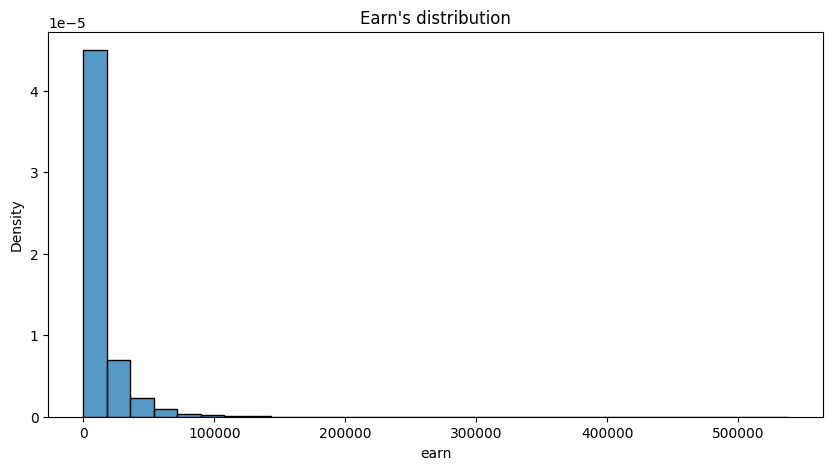

In [6]:
# Creamos un histograma para ver la distribución de los ingresos
plt.figure(figsize=(10,5))
sns.histplot(df['earn'], bins=30, kde=False, stat='density')
plt.title("Earn's distribution")
plt.savefig('hist1.png') 
plt.show()

Se ve que hay mujeres que no ganan nada y hay otras que ganan mucho, con el fin de que nuestra regresión sea menos susceptible a aquellos que ganan más, es conveniente trabajar esta variable con logaritmos.

In [7]:
# Lo transformamos a logaritmos
df['ln_earn'] = df['earn'].apply(lambda x: np.log(x) if x > 0 else np.nan)

# Habrá filas  con NaN porque los ceros en earn, por lo que serán eliminados
df = df.dropna(subset=['ln_earn'])
df

,state,year,urate,children,nonwhite,finc,earn,age,ed,work,unearn,anykids,post93,ln_earn
0,11.0,1991.0,7.6,0,1,18714.394273,18714.394273,26,10,1,0.000000,0,0,9.837048
1,12.0,1991.0,7.2,1,0,4838.568282,471.365639,22,9,1,4.367203,1,0,6.155634
4,15.0,1991.0,8.6,3,1,14706.607930,14706.607930,23,7,1,0.000000,1,0,9.596052
5,16.0,1991.0,6.8,1,0,21605.044053,18854.625551,53,7,1,2.750419,1,0,9.844514
6,21.0,1991.0,7.3,0,1,19146.872247,14140.969163,52,11,1,5.005903,0,0,9.556831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13739,95.0,1996.0,6.4,0,0,74071.414914,61785.850860,53,7,1,12.285564,0,1,11.031430
13740,95.0,1996.0,6.4,3,0,28266.003824,14689.483748,43,10,0,13.576520,1,1,9.594887
13742,95.0,1996.0,6.4,0,0,30704.703633,30688.336520,42,10,1,0.016367,0,1,10.331638
13743,95.0,1996.0,6.4,2,0,43495.602294,43475.143403,53,3,0,0.020459,1,1,10.679945


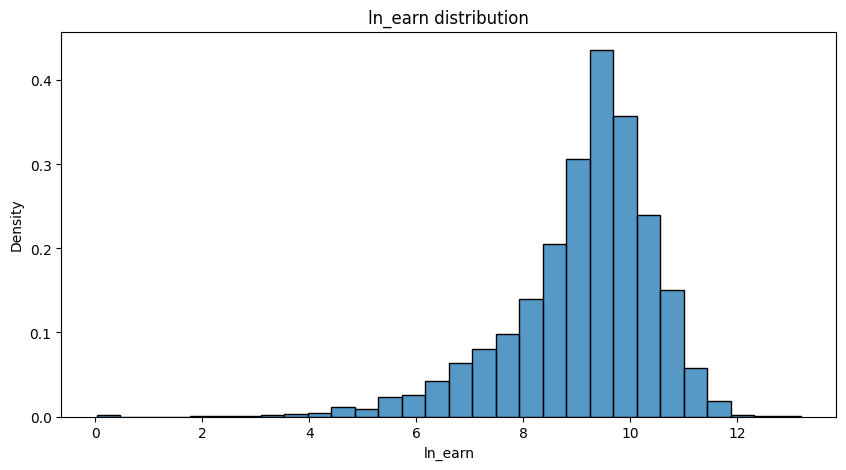

In [8]:
# Histograma de ln_earn
plt.figure(figsize=(10,5))
sns.histplot(df['ln_earn'], bins=30, kde=False, stat='density')
plt.title("ln_earn distribution")
plt.savefig('hist2.png') 
plt.show()

Ahora continuemos con las regresiones

In [9]:
# Creamos la variable did
df['post_treatment'] = df['post93'] * df['anykids']

# Corremos una regresión simple
model1 = smf.ols('ln_earn ~ post93 + anykids + post_treatment', data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                ln_earn   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     105.7
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           3.67e-67
Time:                        20:55:34   Log-Likelihood:                -14252.
No. Observations:                8400   AIC:                         2.851e+04
Df Residuals:                    8396   BIC:                         2.854e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          9.4012      0.028    330.

El coeficiente did del primero modelo es $0.1608$ significativo al $99$%

### 5. Repeat (4), but now include state and year fixed effects [Hint: state fixed effects, are included when we include a dummy variable for each state]. Do you get similar estimated treatment effects compared to (4)?

In [10]:
# Corremos una regresión incluyendo efectos fijos de estado y de año 

# Con C(state) y C(year) se está creando una dummy por estado y año respectivamente
model2 = smf.ols('ln_earn ~ post93 + anykids + post_treatment + C(state) + C(year)', data=df).fit(cov_type='HC0') 
print(model2.summary())

#El estado 11 y el año 1991 están siendo omitidos

                            OLS Regression Results                            
Dep. Variable:                ln_earn   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                    0.6884
Date:                Mon, 03 Feb 2025   Prob (F-statistic):              0.407
Time:                        20:55:37   Log-Likelihood:                -14115.
No. Observations:                8400   AIC:                         2.835e+04
Df Residuals:                    8342   BIC:                         2.875e+04
Df Model:                          57                                         
Covariance Type:                  HC0                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             9.1335      0.20

En el primer modelo (4) el coeficiente did resultó $0.1608$ significativo al $99$%, mientras en el segundo modelo (5) se obtuvo un coeficiente de $0.1429$ significativo al $95$%. **Por lo tanto, son muy similares**

### 6. Using the specification from (5), re-estimate this model including urate nonwhite age ed unearn, as well as state and year FEs as controls. Do you get similar estimated treatment effects compared to (5)?

In [11]:
# Agregamos variables control a la regresión
controls = 'urate + nonwhite + age + ed + unearn'

#Regresión con FEs y controles
model3 = smf.ols(f'ln_earn ~ post93 + anykids + post_treatment + C(state ) + C(year) + {controls}', data=df).fit(cov_type='HC0')
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                ln_earn   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     11.44
Date:                Mon, 03 Feb 2025   Prob (F-statistic):          1.80e-105
Time:                        20:55:41   Log-Likelihood:                -14083.
No. Observations:                8400   AIC:                         2.829e+04
Df Residuals:                    8337   BIC:                         2.874e+04
Df Model:                          62                                         
Covariance Type:                  HC0                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             9.1167      0.29

El tercer modelo (6) tiene un coeficiente did de $0.1538$ significativo al $99$%, mientras que el segundo modelo (5) tiene un coeficiente de $0.1429$ significativo al $95$%. **Por lo tanto, los resultados siguen siendo muy similares, variando apenas por un 1%**

### 7. Estimate a version of your model that allows the treatment effect to vary by those with 1 or 2+ children. Include all other variables as in (6). Does the intervention seem to be more effective for one of these groups over the other? Why might this be the case in the real world?

Hacemos estimaciones para cada grupo

In [12]:
# Regresión solo para aquellas con un solo hijo
reg1 = smf.ols(f'ln_earn ~ post93 + anykids + post_treatment + C(state) + C(year) + {controls}', data=df[df['children'] == 1]).fit(cov_type='HC0')
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                ln_earn   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     385.3
Date:                Mon, 03 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:55:45   Log-Likelihood:                -3270.7
No. Observations:                1939   AIC:                             6663.
Df Residuals:                    1878   BIC:                             7003.
Df Model:                          60                                         
Covariance Type:                  HC0                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.1484      0.31

In [13]:
# Regresión solo para aquellas con 2 o más hijos
reg2 = smf.ols(f'ln_earn ~ post93 + anykids + post_treatment + C(state) + C(year) + {controls}', data=df[df['children'] >= 2]).fit(cov_type='HC0')
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                ln_earn   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     2086.
Date:                Mon, 03 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:55:49   Log-Likelihood:                -4138.5
No. Observations:                2424   AIC:                             8399.
Df Residuals:                    2363   BIC:                             8752.
Df Model:                          60                                         
Covariance Type:                  HC0                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.9104      0.34

Se obtuvo para la regresión de un solo hijo el coeficiente did de $0.0684$ y para la regresión de dos o más hijos $0.0054$, resultando ambos no significativos. Aunque el coeficiente es positivo para ambos grupos, siendo mayor para el grupo con un solo hijo, esto significa que no hay diferencia real en los efectos entre ambos grupos. Otra posible explicación es que el tamaño de la muestra por cada grupo puede no ser lo suficientemente grande como para detectar las diferencias en ambos grupos.

### 8. Estimate a “placebo” treatment model as follows: Take data from only the pre-reform period (up to and including 1993). Drop the rest, or restrict your model to run only if year <= 1993. Estimate the effect for all affected women together, just as in (6). Introduce a placebo policy that begins in 1992 (so 1992 and 1993 are both “treated” with this fake policy). What do you find? Are your results “reassuring”?

In [14]:
# Creamos un nuevo dataframe
df_placebo = df[df['year'] <= 1993].copy()

# Creamos una nueva varaible post de placebo
df_placebo['post92'] = (df_placebo['year'] >= 1992).astype(int)

# Creamos el nuevo did placebo
df_placebo['post_treatment_placebo'] = df_placebo['post92'] * df_placebo['anykids']
df_placebo


,state,year,urate,children,nonwhite,finc,earn,age,ed,work,unearn,anykids,post93,ln_earn,post_treatment,post92,post_treatment_placebo
0,11.0,1991.0,7.6,0,1,18714.394273,18714.394273,26,10,1,0.000000,0,0,9.837048,0,0,0
1,12.0,1991.0,7.2,1,0,4838.568282,471.365639,22,9,1,4.367203,1,0,6.155634,0,0,0
4,15.0,1991.0,8.6,3,1,14706.607930,14706.607930,23,7,1,0.000000,1,0,9.596052,0,0,0
5,16.0,1991.0,6.8,1,0,21605.044053,18854.625551,53,7,1,2.750419,1,0,9.844514,0,0,0
6,21.0,1991.0,7.3,0,1,19146.872247,14140.969163,52,11,1,5.005903,0,0,9.556831,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7547,95.0,1993.0,4.3,0,0,32211.072664,32211.072664,25,3,1,0.000000,0,0,10.380066,0,1,0
7548,95.0,1993.0,4.3,2,0,115884.332180,108766.795850,53,7,1,7.117536,1,0,11.596961,0,1,1
7551,95.0,1993.0,4.3,2,0,8885.813149,8885.813149,36,10,1,0.000000,1,0,9.092211,0,1,1
7552,95.0,1993.0,4.3,0,0,3333.290657,3333.290657,50,7,1,0.000000,0,0,8.111715,0,1,0


In [15]:
#Regresión placebo con FEs y controles
reg_pla = smf.ols(f'ln_earn ~ post92 + anykids + post_treatment_placebo + C(state ) + C(year) + {controls}', data=df_placebo).fit(cov_type='HC0')
print(reg_pla.summary())

                            OLS Regression Results                            
Dep. Variable:                ln_earn   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     8.012
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           7.01e-62
Time:                        20:55:54   Log-Likelihood:                -7429.4
No. Observations:                4422   AIC:                         1.498e+04
Df Residuals:                    4362   BIC:                         1.536e+04
Df Model:                          59                                         
Covariance Type:                  HC0                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  8

Del modelo placebo se obtuvo el coeficiente did igual a $-0.0298$, el cual no es signicativo y valida la estimación principal (6). Esto demuestra que antes de la implementación del EITC en 1994, las mujeres con hijos y sin hijos no seguían tendencias diferentes, dando así una prueba estadistica de las tendencias paralelas entre tratados y control antes del tratamiento. 